In [ ]:
# Mount Google Drive and set the current directory to 'My Drive'
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Facultate/II-Sem I/PI-P/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Facultate/II-Sem I/PI-P


In [ ]:
# Importing OpenCV (cv2), NumPy, and cv2_imshow from Google Colab patches
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Specifying the file path for the image
image_path = "Iris1/Iris1.jpg"

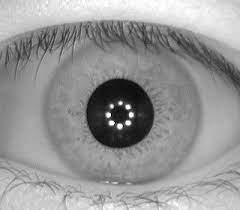

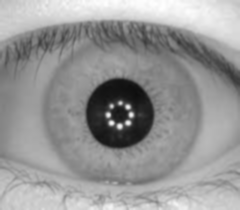

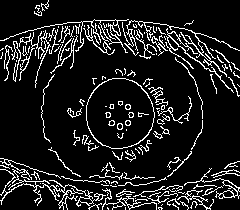

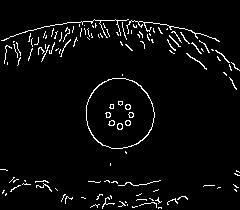

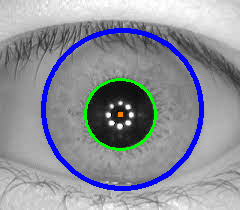

In [ ]:
# Display grayscale image
image_read = cv2.imread(image_path)
output = image_read.copy()
image_test = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image_test)

# Display the blured image
image_test = cv2.GaussianBlur(image_test, (7, 7), 1)
cv2_imshow(image_test)

# Display the Canny edge-detected image
image_test = cv2.Canny(image_test, 20, 70, apertureSize=3)
cv2_imshow(image_test)

# Detect circles using Hough Circle Transform and draw them on the original image.
hough_circle = cv2.HoughCircles(image_test, cv2.HOUGH_GRADIENT, 1.3, 800)

if hough_circle is not None:
    hough_circle = np.round(hough_circle[0, :]).astype("int")

    for (x, y, radius) in hough_circle:
        cv2.circle(output, (x, y), radius, (255, 0, 0), 4)

# Read the image again, adjust parametersand apply edge detection.
image_test = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_test = cv2.GaussianBlur(image_test, (7, 7), 1)

# Display the second Canny edge-detected image
image_test = cv2.Canny(image_test, 100, 120, apertureSize=3)
cv2_imshow(image_test)

# Apply Hough Circle Transform again with different parameters
circles = cv2.HoughCircles(image_test, cv2.HOUGH_GRADIENT, 1, 800,
                            param1=50, param2=20, minRadius=0, maxRadius=60)

# Detect circles again with altered parameters and draw on the original image.
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)

# Display the final output image with detected circles
cv2_imshow(output)